#### Aykırı Gözlem
- Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözleme aykırı gözlem denir.

- Aykırı Değer aykırılığı ifade eden nümerik değere aykırı değer denir.  Aykırı değeri barındıran gözlem birimine aykırı gözlem denir.

## Neye Göre Kime Göre Aykırı Gözlem?

1. Sektör Bilgisi 

Örneğin bir ev fiyat tahmin modelinde 1000 metrekarelik evleri modellemeye almamak.

2. Standart Sapma yaklaşımı

Bir değişkenin ortalamasının üzerine aynı değişkeniin standart sapması hesaplanarak eklenir.1,2 ya da 3 standart sapma değeri ortalama değer üzerine eklenerek ortaya çıkan bu değer eşik değer olarak düşünülür ve bu değerden yukarıda ya da aşağıda olan değerler aykırı değer olarak kabul edilir.

kısıtlama_değer = ortalama +- 2 * std

3. Z-Skoru Yaklaşımı 

Standart sapma yöntemine benzer şekilde çalışır. Değişken standart normal dağılıma uygulanır , yani standartlaştırılır. Sonrasında örneğin dağılımın sağından ve solundan -+2,5 değerine göre bir eşik değer konulur ve bu değerin üzerinde ya altında olan değerler aykırı olarak işaretlenir.

4. Boxplot Yöntemi

En sık kullanılan yöntemlerden biridir. Değişkenin değerleri küçükten büyüğe sıralanır. Çeyrekliklerine (yüzdeliklerine) yani Q1,Q3 değerlerine karşılık değerler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı değer tanımı yapılır. 



## Aykırı Gözlem Analizi

#### Aykırı Değeri Yaklamak

select_dtypes(include=['float64','int64']) : 

- Bu metod, DataFrame’in içinden sadece belirli veri tiplerine sahip sütunları seçmek için kullanılır.

Sen include=['float64','int64'] yazınca:

- Sadece sayısal sütunlar (tam sayı int64 ve ondalıklı sayı float64) DataFrame’de kalır.

- String (object), kategori (category), tarih (datetime64) gibi sütunlar elenecek.

In [3]:
import seaborn as sns
df =  sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64','int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df_table = df['table']
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<Axes: xlabel='table'>

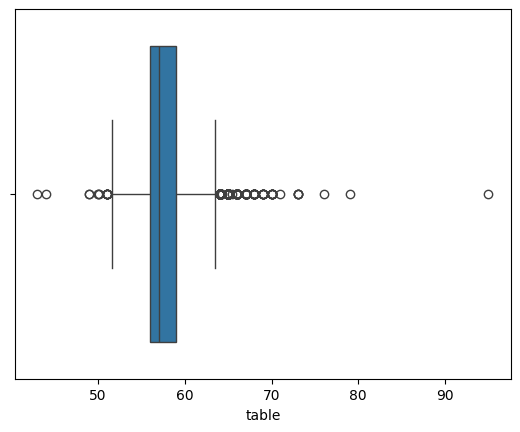

In [6]:
sns.boxplot(x = df_table)

In [10]:
Q1 = df_table.quantile(0.25) # Sıralandığında %25. küçük değer
Q3 = df_table.quantile(0.75) 
IQR = Q3 - Q1
IQR

np.float64(3.0)

In [8]:
Q1

np.float64(56.0)

In [9]:
Q3

np.float64(59.0)

In [12]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
(alt_sinir,ust_sinir)

(np.float64(51.5), np.float64(63.5))

In [18]:
df_table < alt_sinir 

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [19]:
(df_table < alt_sinir) | (df_table > ust_sinir) 

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [20]:
aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir) 
aykiri_tf.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [ ]:
##df_table[aykiri_tf]
df_table[(df_table < alt_sinir) | (df_table > ust_sinir)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [23]:
df[aykiri_tf].index

Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,   359,
       ...
       53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757, 53785],
      dtype='int64', length=605)

In [24]:
## Silme yaklaşımı 
import pandas as pd

In [25]:
type(df_table)

pandas.core.series.Series

In [27]:
t_df =  pd.DataFrame(df_table)
t_df = df_table[~((df_table < alt_sinir ) | (df_table > ust_sinir))]
t_df.head() ## aykırı değerler silindi örn index 2

0    55.0
1    61.0
3    58.0
4    58.0
5    57.0
Name: table, dtype: float64

In [28]:
t_df.shape

(53335,)

#### Ortalama ile doldurma

In [36]:
### Ortalama ile doldurma

df_table = df['table']
df_table.head()

0    55.000000
1    61.000000
2    57.457184
3    58.000000
4    58.000000
Name: table, dtype: float64

In [ ]:
df_table[(df_table < alt_sinir) | (df_table > ust_sinir)] = df_table.mean() ## ortalama ile değiştirme 

df_table

C:\Users\ogulc\AppData\Local\Temp\ipykernel_32792\292401932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[(df_table < alt_sinir) | (df_table > ust_sinir)] = df_table.mean()


0        55.000000
1        61.000000
2        57.457184
3        58.000000
4        58.000000
           ...    
53935    57.000000
53936    55.000000
53937    60.000000
53938    58.000000
53939    55.000000
Name: table, Length: 53940, dtype: float64

#### Baskılama Yöntemi 

In [42]:
## Baskılama Yöntemi 
df =  sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64','int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [44]:
df_table = df['table']
df_table.head() 

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [46]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(3.0)

In [47]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
(alt_sinir, ust_sinir)

(np.float64(51.5), np.float64(63.5))

In [ ]:
df_table[df_table < alt_sinir]
df_table[df_table < alt_sinir] = alt_sinir

df_table[df_table == 51.5] # alt sinirdan küçük olanlar alt sinira eşitlendi

C:\Users\ogulc\AppData\Local\Temp\ipykernel_32792\1644488405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[df_table < alt_sinir] = alt_sinir


1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [ ]:
df_table[df_table > ust_sinir]
df_table[df_table > ust_sinir] = ust_sinir
df_table[df_table == 63.5] # üst sinirdan büyük olanlar üst sinira eşitlendi

C:\Users\ogulc\AppData\Local\Temp\ipykernel_32792\561726669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[df_table > ust_sinir] = ust_sinir


2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 590, dtype: float64

In [58]:
df_table.min()

np.float64(51.5)

In [59]:
df_table.max()

np.float64(63.5)

---

### Çok Değişkenli Aykırı Gözlem Analizi 

Örneğin :
- Bir insan 12 yaşında olabilir.
- Bir insan 12 kez trafik kazası geçirmiş olabilir.

---

ama bu durum birlikte değerlendirildiğinde 12 yaşında birisinin 12 kez trafik kazası geçirmesi pek mümkün değildir. (tabiki olabilir ama aykırı değer sınıfına girer) Verileri birlikte incelediğimizde çıkan aykırı gözlemlere Çok Değişkenli aykırı gözlem deriz.


In [61]:
import seaborn as sns
data_set = sns.load_dataset('diamonds')
data_set = data_set.select_dtypes(include=['float64','int64'])
df = data_set.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [64]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [65]:
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [66]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1], shape=(53940,))

In [67]:
df_scores = clf.negative_outlier_factor_

In [68]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [72]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [94]:
esik_deger = np.sort(df_scores)[3] ##bunu eşik değer kabul et

In [ ]:
yeni_df = df[df_scores > esik_deger] ##aykırı olmayan değerler
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [97]:
aykiri_df = df[df_scores > esik_deger] ##aykırı olan değerler

##aykırı olan değerlere istenilen işlemler yapılabilir

---

---

---